In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/normalized.csv')
display(df.shape)
df.head()

(636427, 15)

,id,databaseType,totalMem,timeRead,timeDelete,totalTime,timestamp,serverType,clientTotalTime,requestSize,frequency,instanceType,freeMem,timeWrite,memUsage
0,ACPPqr7Uh,nosql,2.147484e+09,117.0,101.0,470.0,1.585877e+12,java,601.0,1.0,1.0,b1,1.883013e+09,159.0,0.123154
1,fHKVs8SiC,nosql,2.147484e+09,46.0,146.0,477.0,1.585877e+12,java,617.0,1.0,1.0,b1,1.882862e+09,179.0,0.123224
2,L2V71vHyZ,nosql,2.147484e+09,33.0,72.0,421.0,1.585877e+12,java,550.0,1.0,1.0,b1,1.882726e+09,175.0,0.123287
3,ASaJPUMQk,nosql,2.147484e+09,47.0,79.0,442.0,1.585877e+12,java,578.0,1.0,1.0,b1,1.882567e+09,235.0,0.123362
4,0-o3JCBrZ,nosql,2.147484e+09,58.0,87.0,443.0,1.585877e+12,java,837.0,1.0,1.0,b1,1.882399e+09,179.0,0.123440


In [2]:
all_keys = ['clientTotalTime', 'cpuUsage', 'databaseType', 'freeMem', 'frequency', 'id', 'instanceType', 'requestSize', 'serverType', 'timeDelete', 'timeRead', 'timeWrite', 'timestamp', 'totalMem', 'totalTime']

servers = sorted(['java', 'nodejs'])
databases = sorted(['nosql', 'sql'])
instances = sorted(['b1', 'b2', 'b4', 'b8'])

combinations = [(servers[0], databases[0]), (servers[1], databases[0]), (servers[0], databases[1]), (servers[1], databases[1])]

sizes = sorted(list(df['requestSize'].unique()))
frequencies = sorted(list(df['frequency'].unique()))

In [3]:
def plot_request_sizes(metric):
    fig, axes = plt.subplots(4)

    for i, instance in enumerate(instances):
        ax = axes[i]

        for combination in combinations:
            server, database = combination

            partial = df.loc[(df['instanceType'] == instance) & (df['serverType'] == server) & (df['databaseType'] == database) & (df[metric] != -1)]
            unique_sizes = sorted(list(partial['requestSize'].unique()))
            
            x_vals = []
            y_vals = []
            
            for size in unique_sizes:
                partial_sizes = partial.loc[df['requestSize'] == size]
                
                if (partial_sizes.shape[0] > 0):
                    x_vals.append(size)
                    y_vals.append(partial_sizes[metric].mean())
                    
            ax.plot(x_vals, y_vals, label=combination)
            
        ax.set_ylim(0)
        ax.set_xticks(sizes)
        ax.set_title(instance.upper() + ' - ' + metric)
        ax.set_xlabel('Payload Sizes (KB)')
        ax.set_ylabel('Time (ms)')
        ax.autoscale_view() 
        ax.legend()
        ax.grid(True)
        
    fig.set_size_inches(22, 25)
    plt.savefig('graphs/times/size-based-{}.png'.format(metric), bbox_inches='tight')
    plt.show()

    
def plot_frequencies(metric):
    fig, axes = plt.subplots(4)

    for i, instance in enumerate(instances):
        ax = axes[i]

        for combination in combinations:
            server, database = combination

            partial = df.loc[(df['instanceType'] == instance) & (df['serverType'] == server) & (df['databaseType'] == database)]
            unique_frequencies = sorted(list(partial['frequency'].unique()))
            
            x_vals = []
            y_vals = []
            
            for freq in unique_frequencies:
                partial_freqs = partial.loc[df['frequency'] == freq]
                
                if (partial_freqs.shape[0] > 0):
                    x_vals.append(freq)
                    y_vals.append(partial_freqs[metric].mean())
                    
            ax.plot(x_vals, y_vals, label=combination)
            
        ax.set_ylim(0)
        ax.set_xticks(frequencies)
        ax.set_title(instance.upper() + ' - ' + metric)
        ax.set_xlabel('Frequencies (Hz)')
        ax.set_ylabel('Time (ms)')
        ax.autoscale_view()
        ax.legend()
        ax.grid(True)
        
    fig.set_size_inches(22, 25)
    plt.savefig('graphs/times/frequency-based-{}.png'.format(metric), bbox_inches='tight')
    plt.show()

### Payload Size Plots

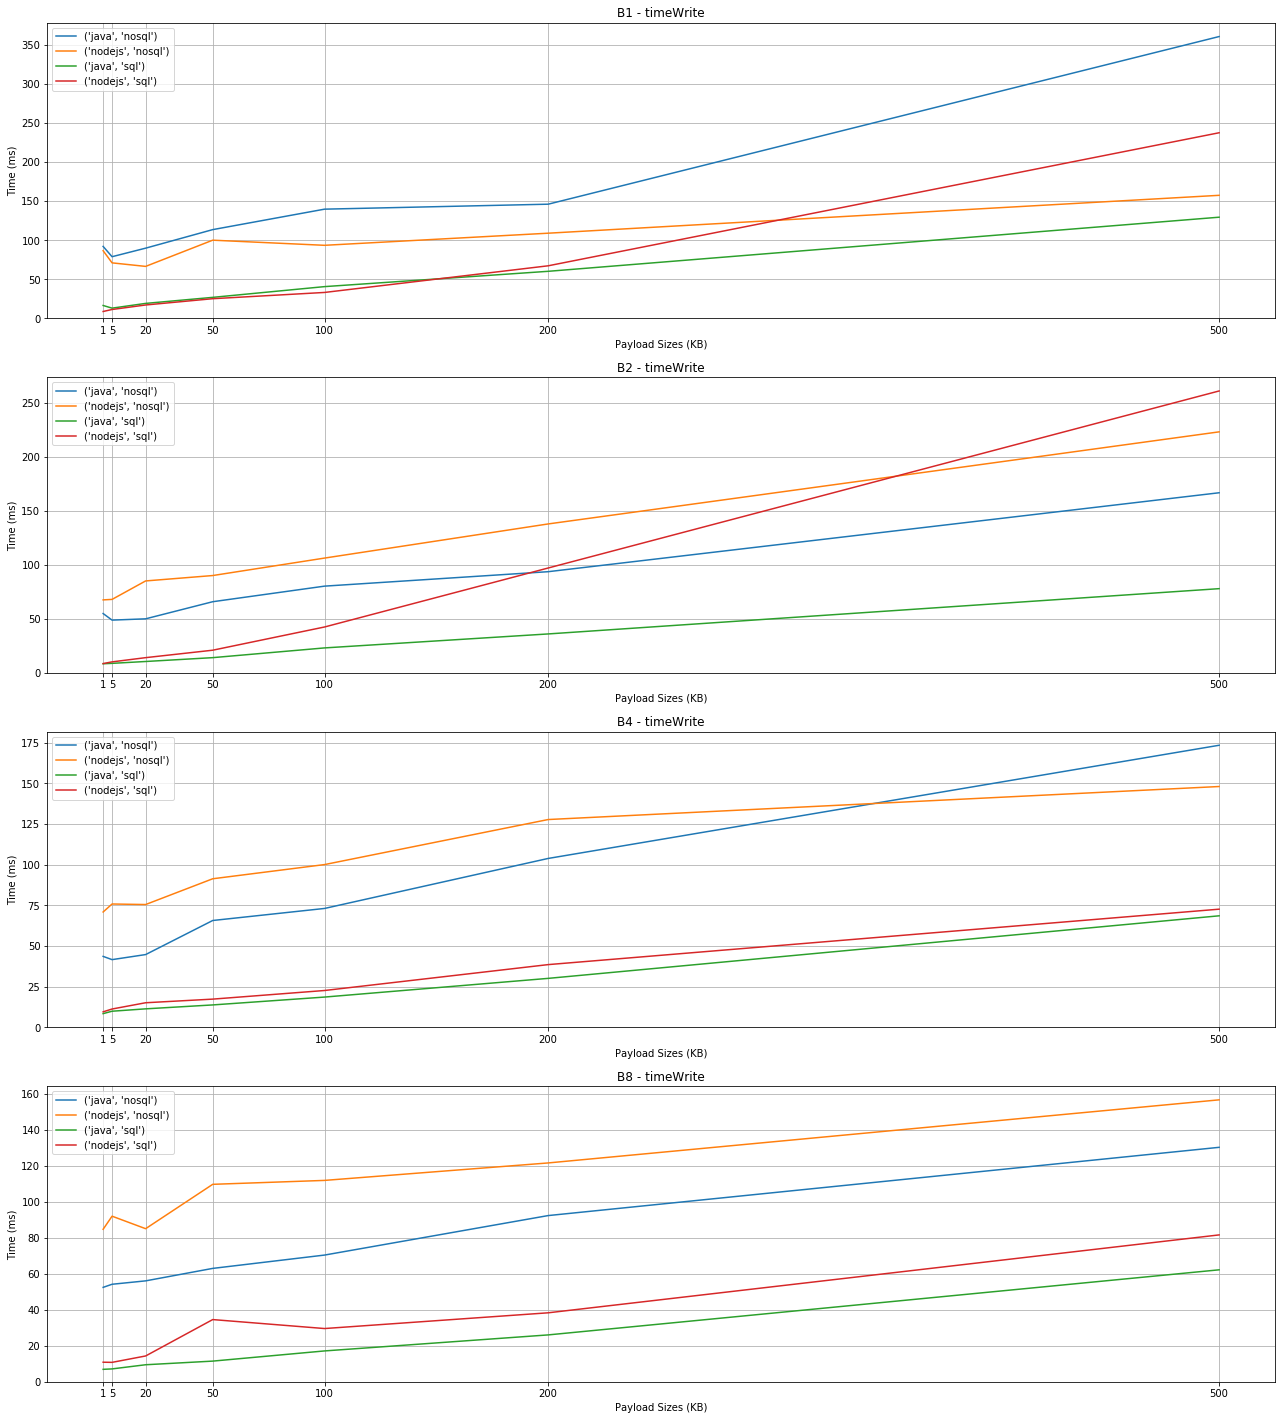

In [4]:
plot_request_sizes('timeWrite')

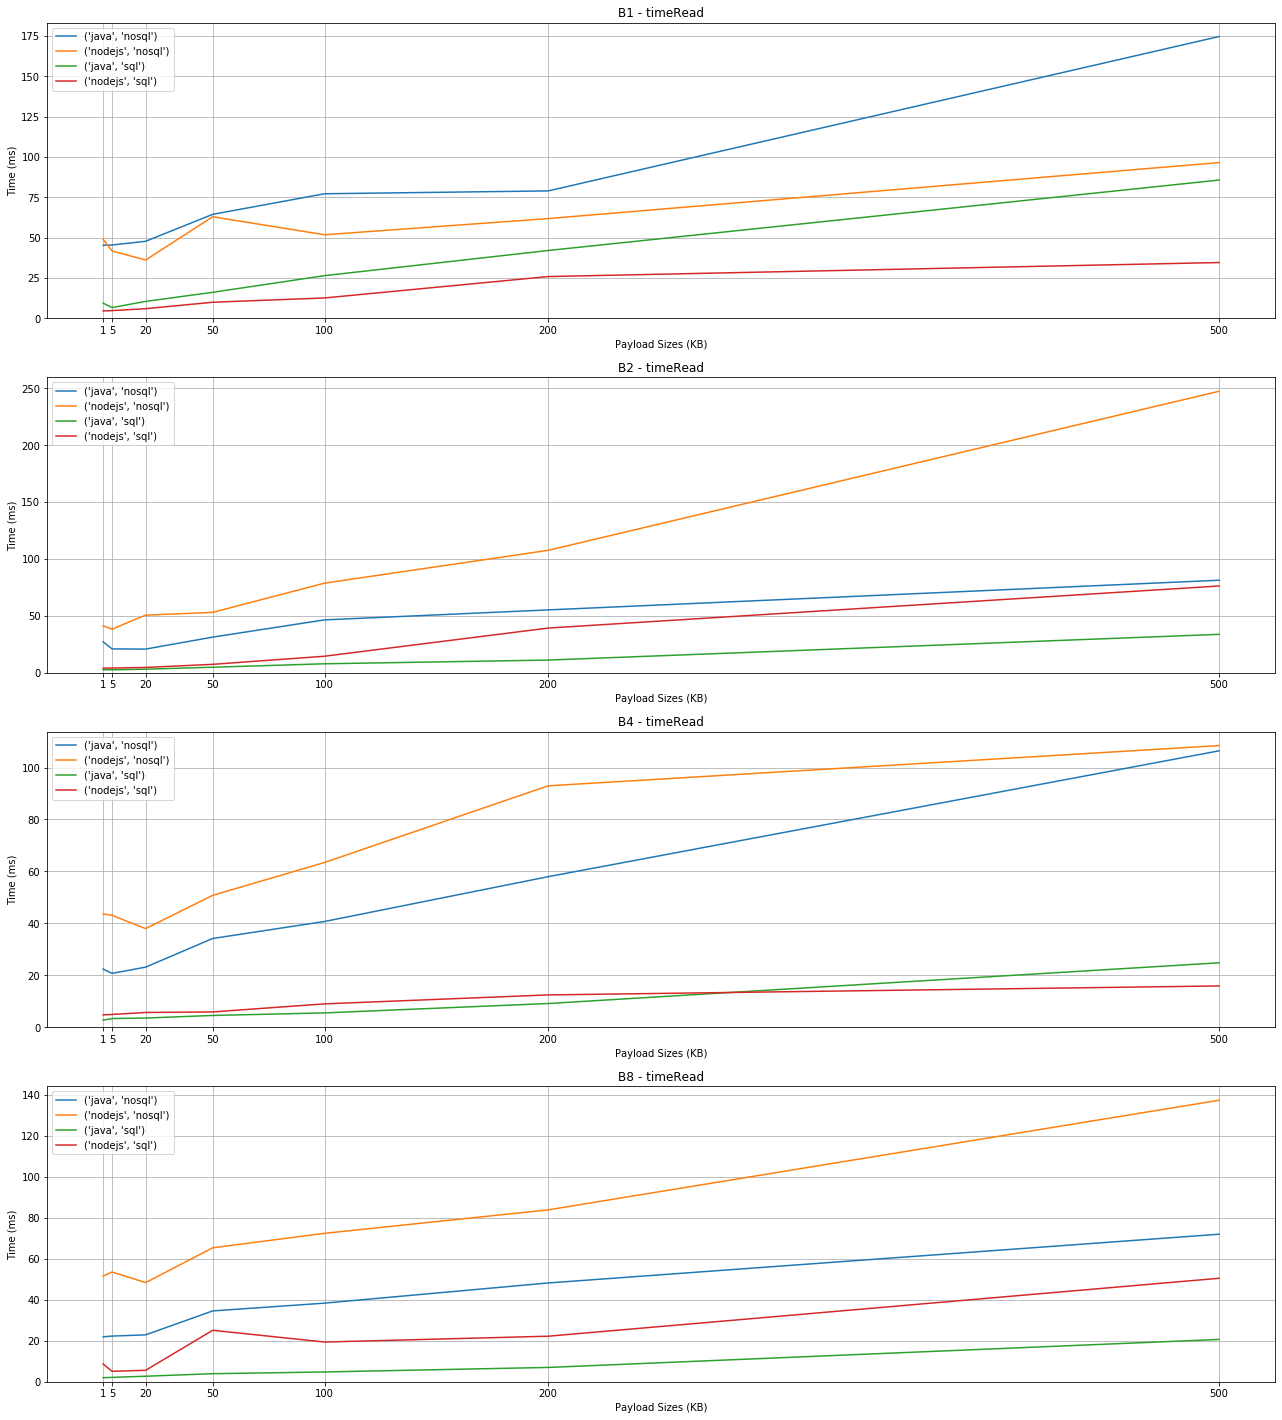

In [5]:
plot_request_sizes('timeRead')

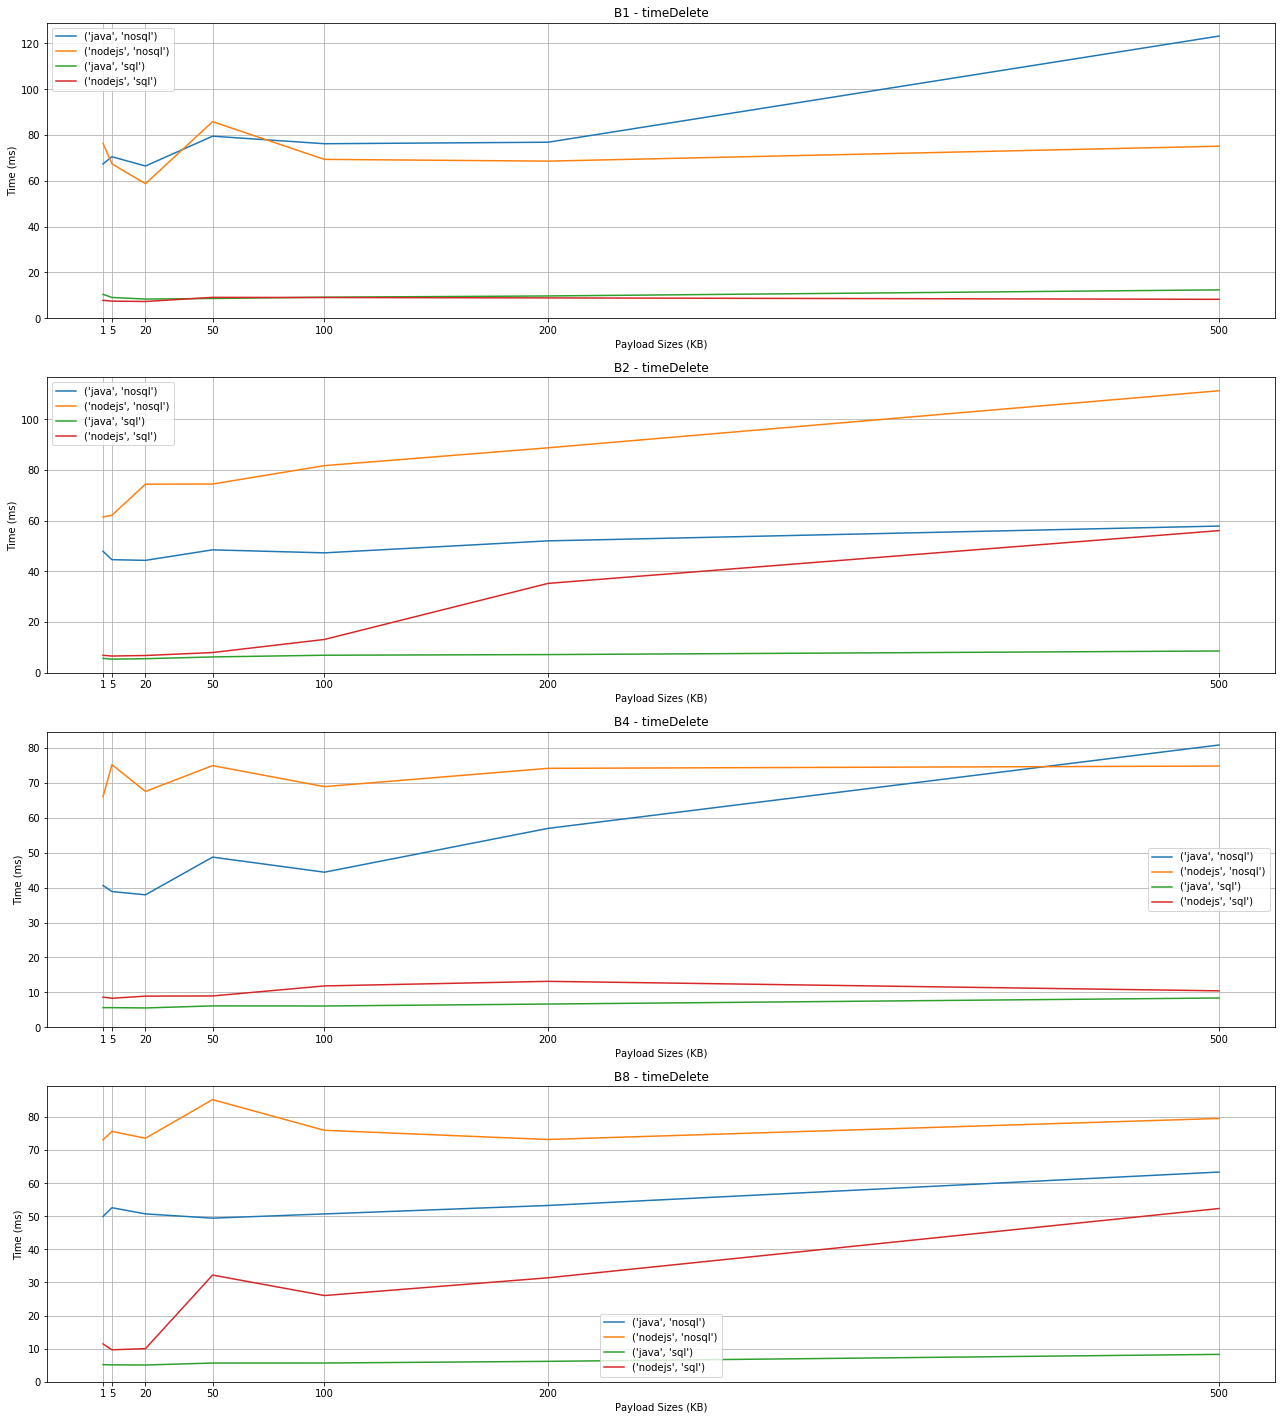

In [6]:
plot_request_sizes('timeDelete')

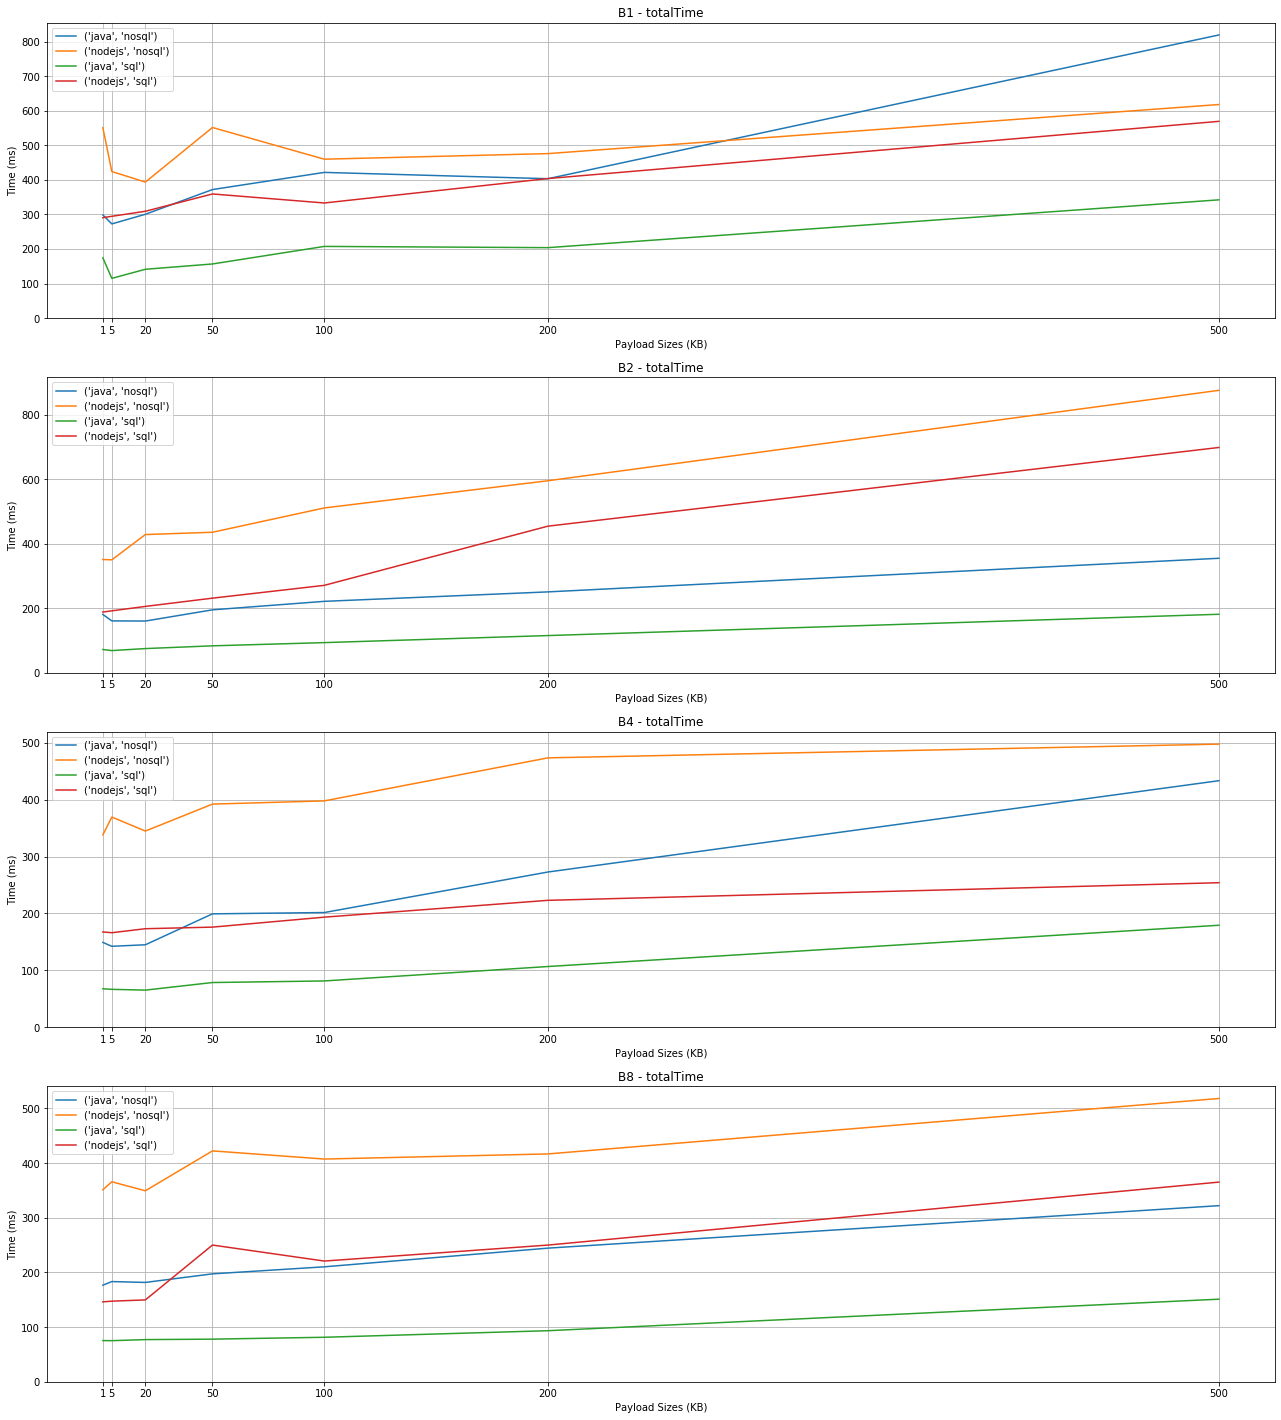

In [7]:
plot_request_sizes('totalTime')

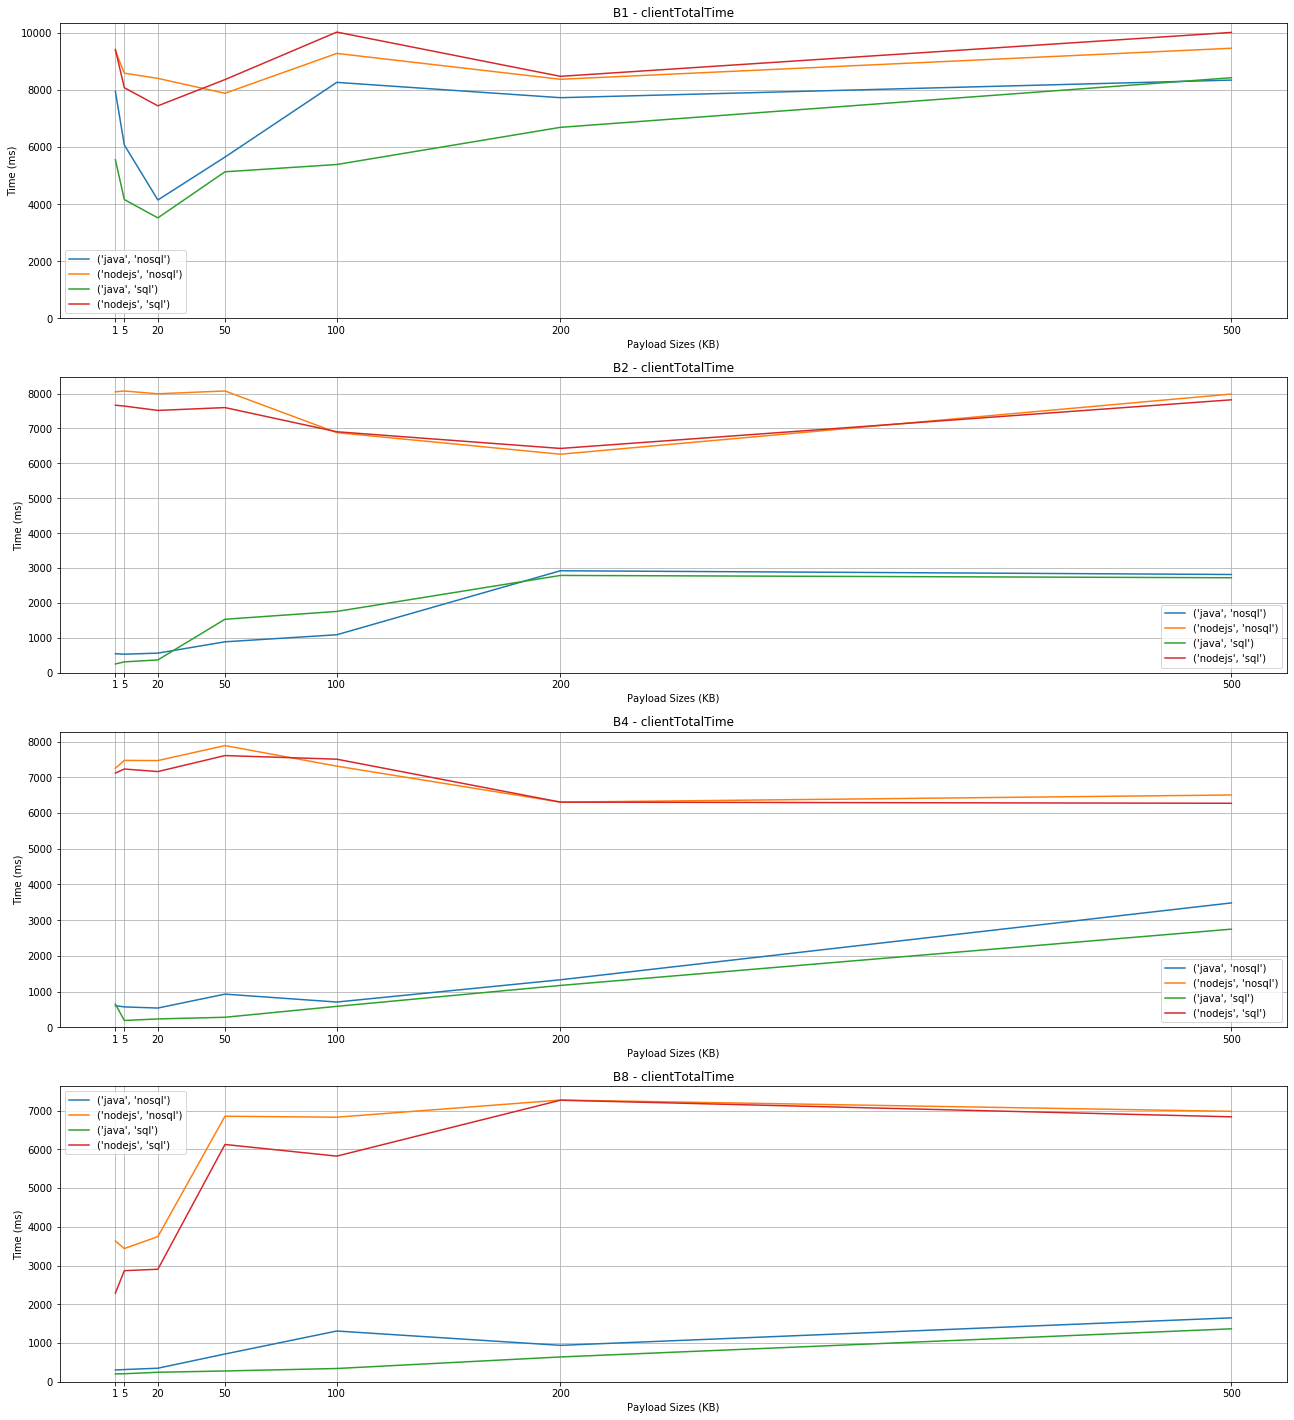

In [8]:
plot_request_sizes('clientTotalTime')

### Frequency Plots

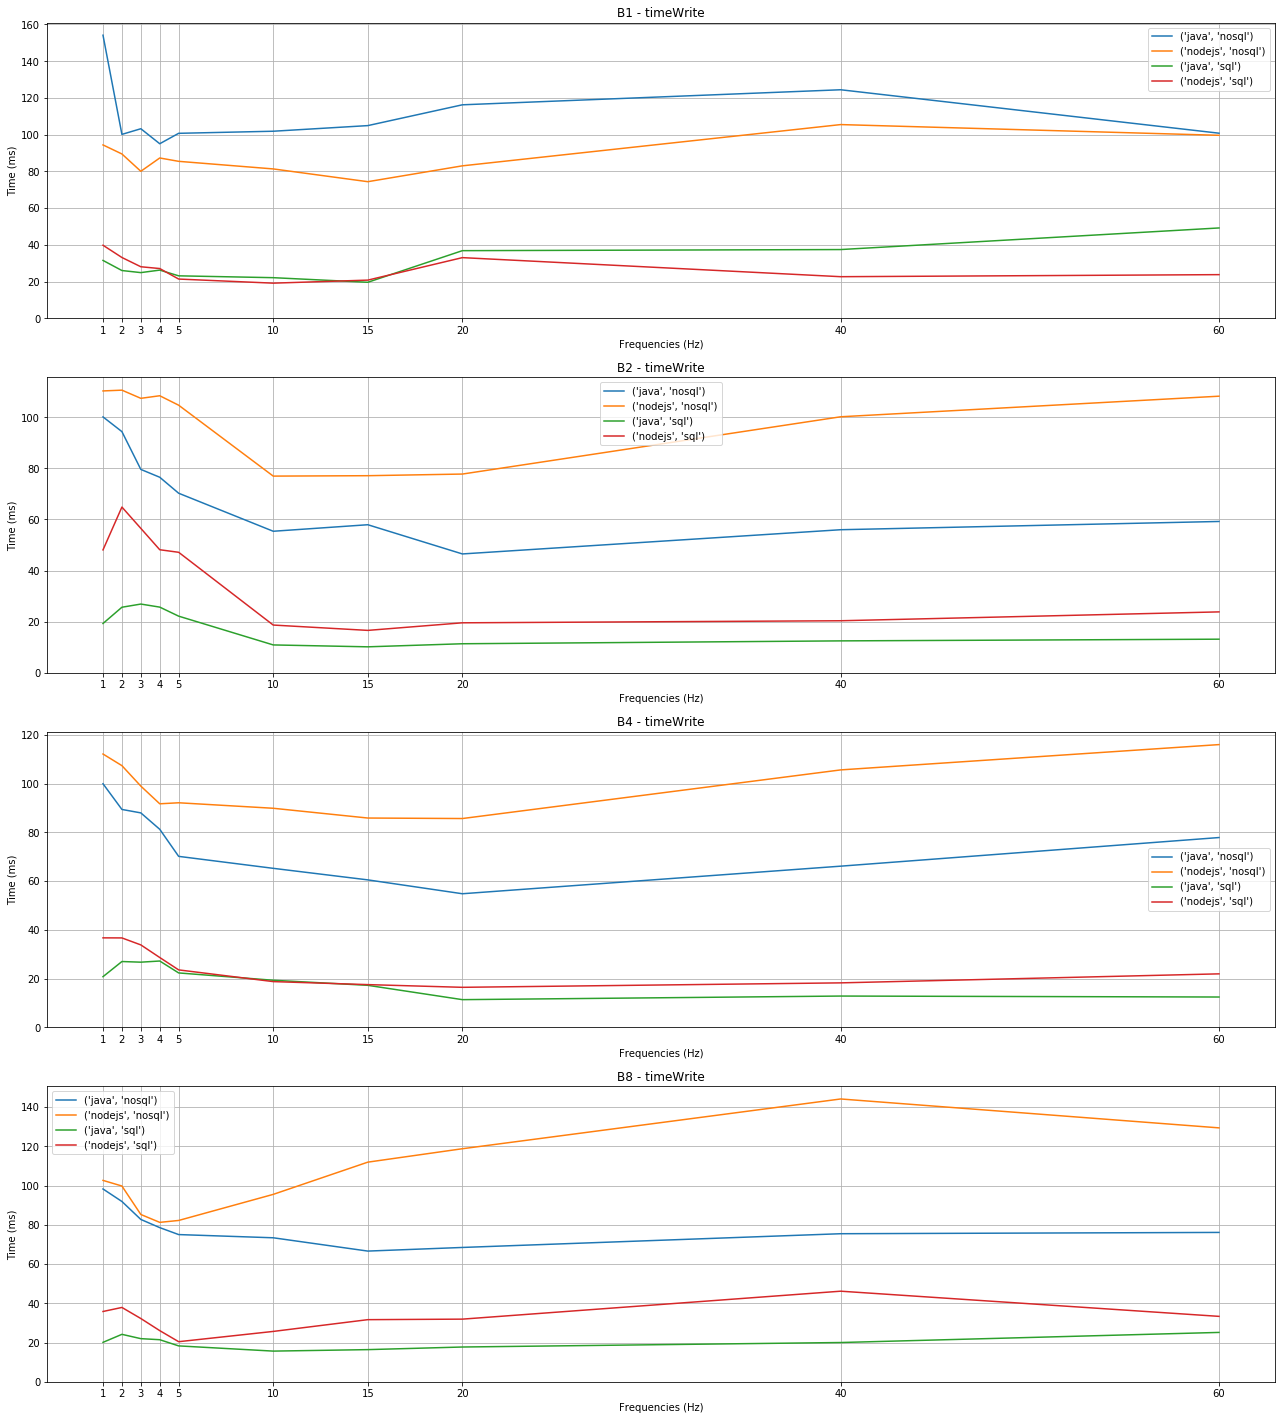

In [9]:
plot_frequencies('timeWrite')

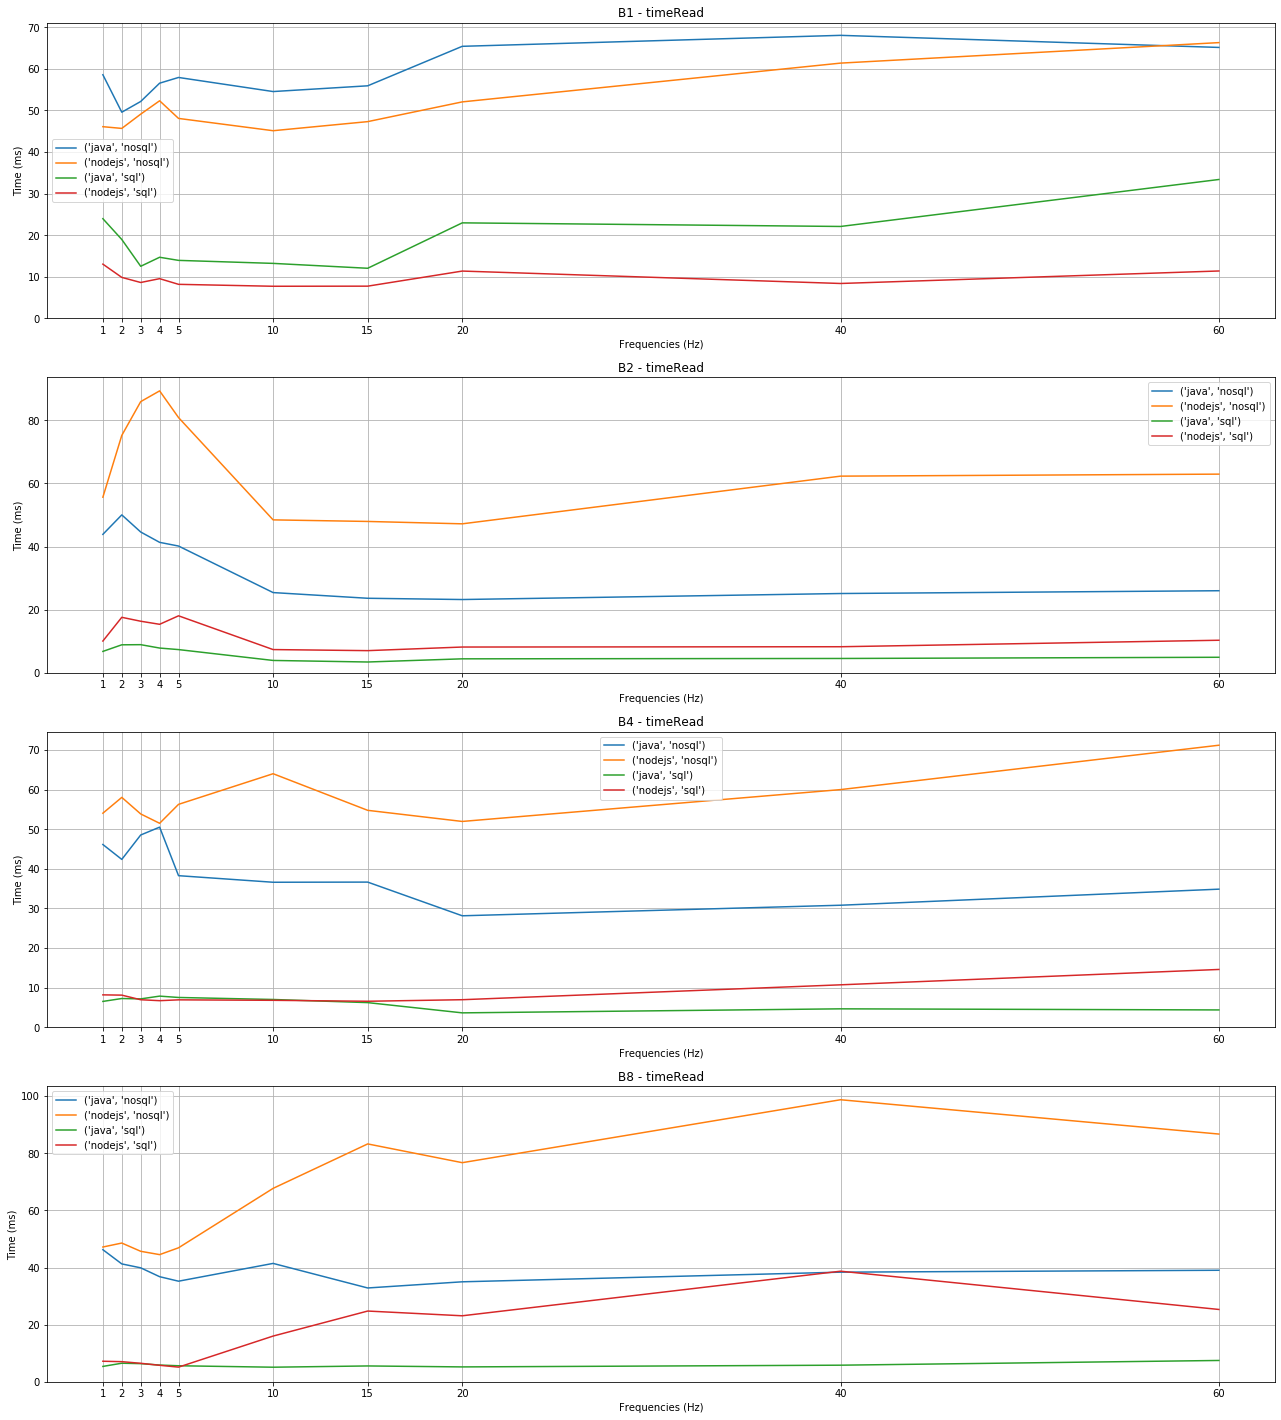

In [10]:
plot_frequencies('timeRead')

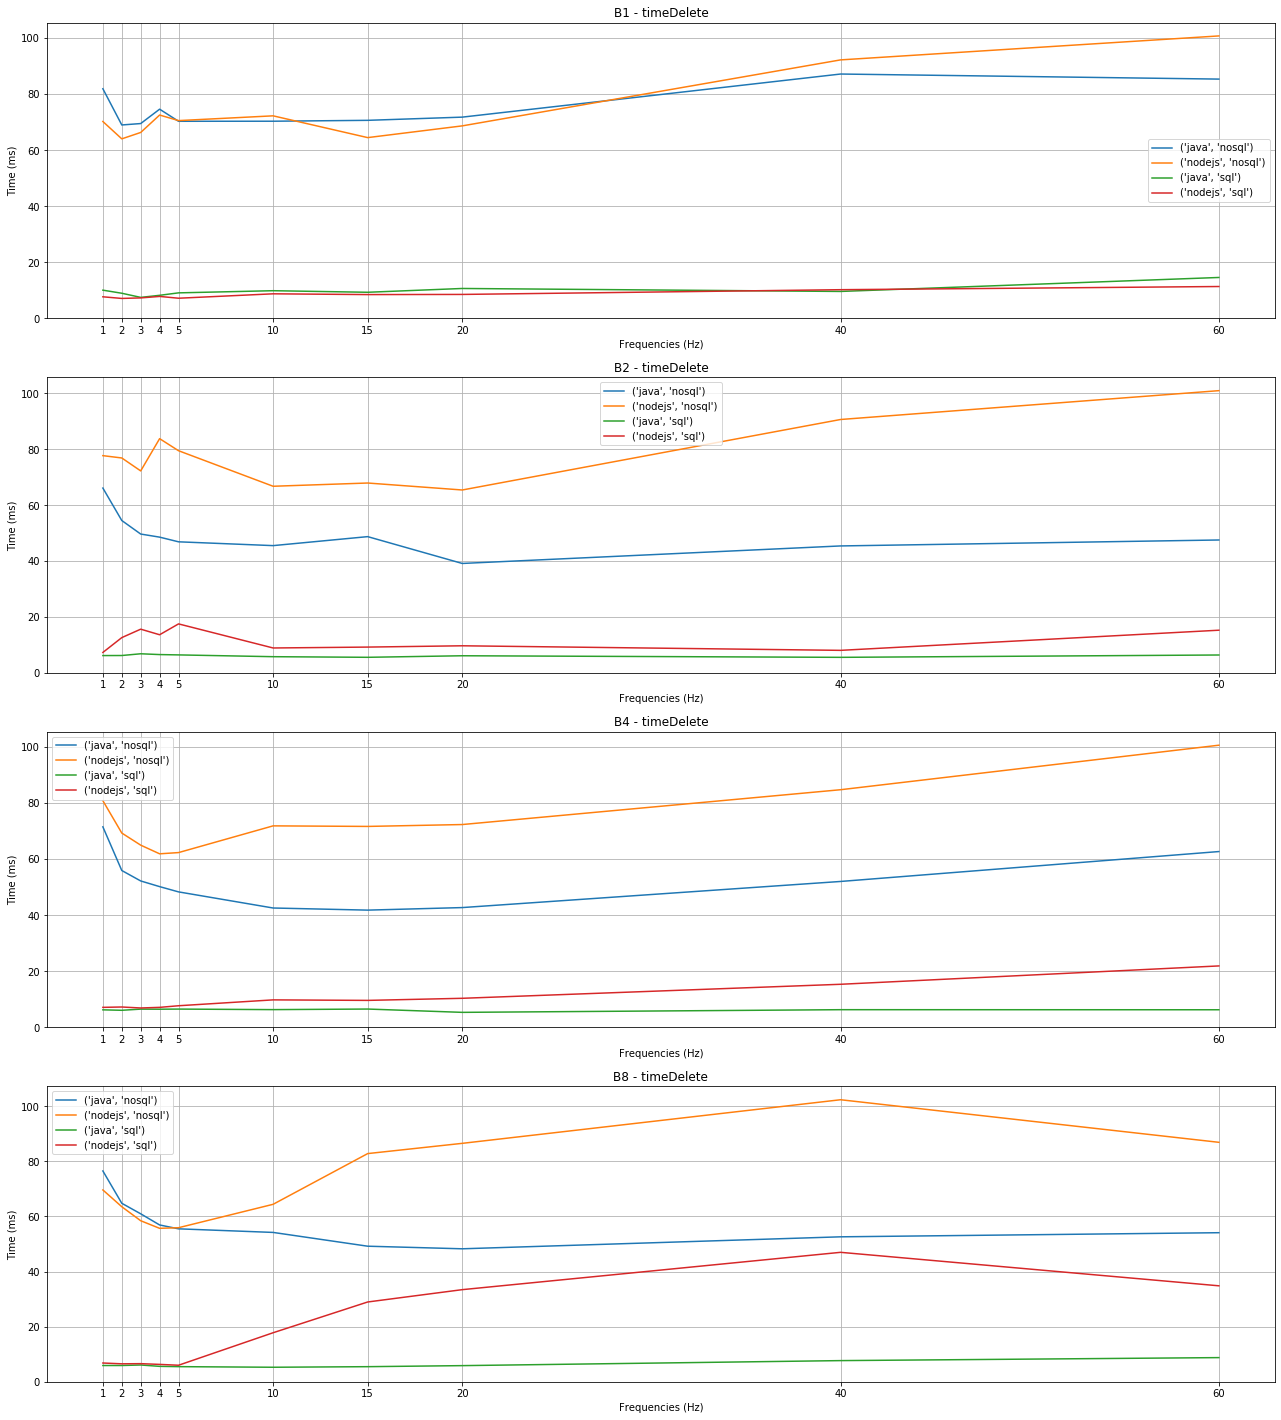

In [11]:
plot_frequencies('timeDelete')

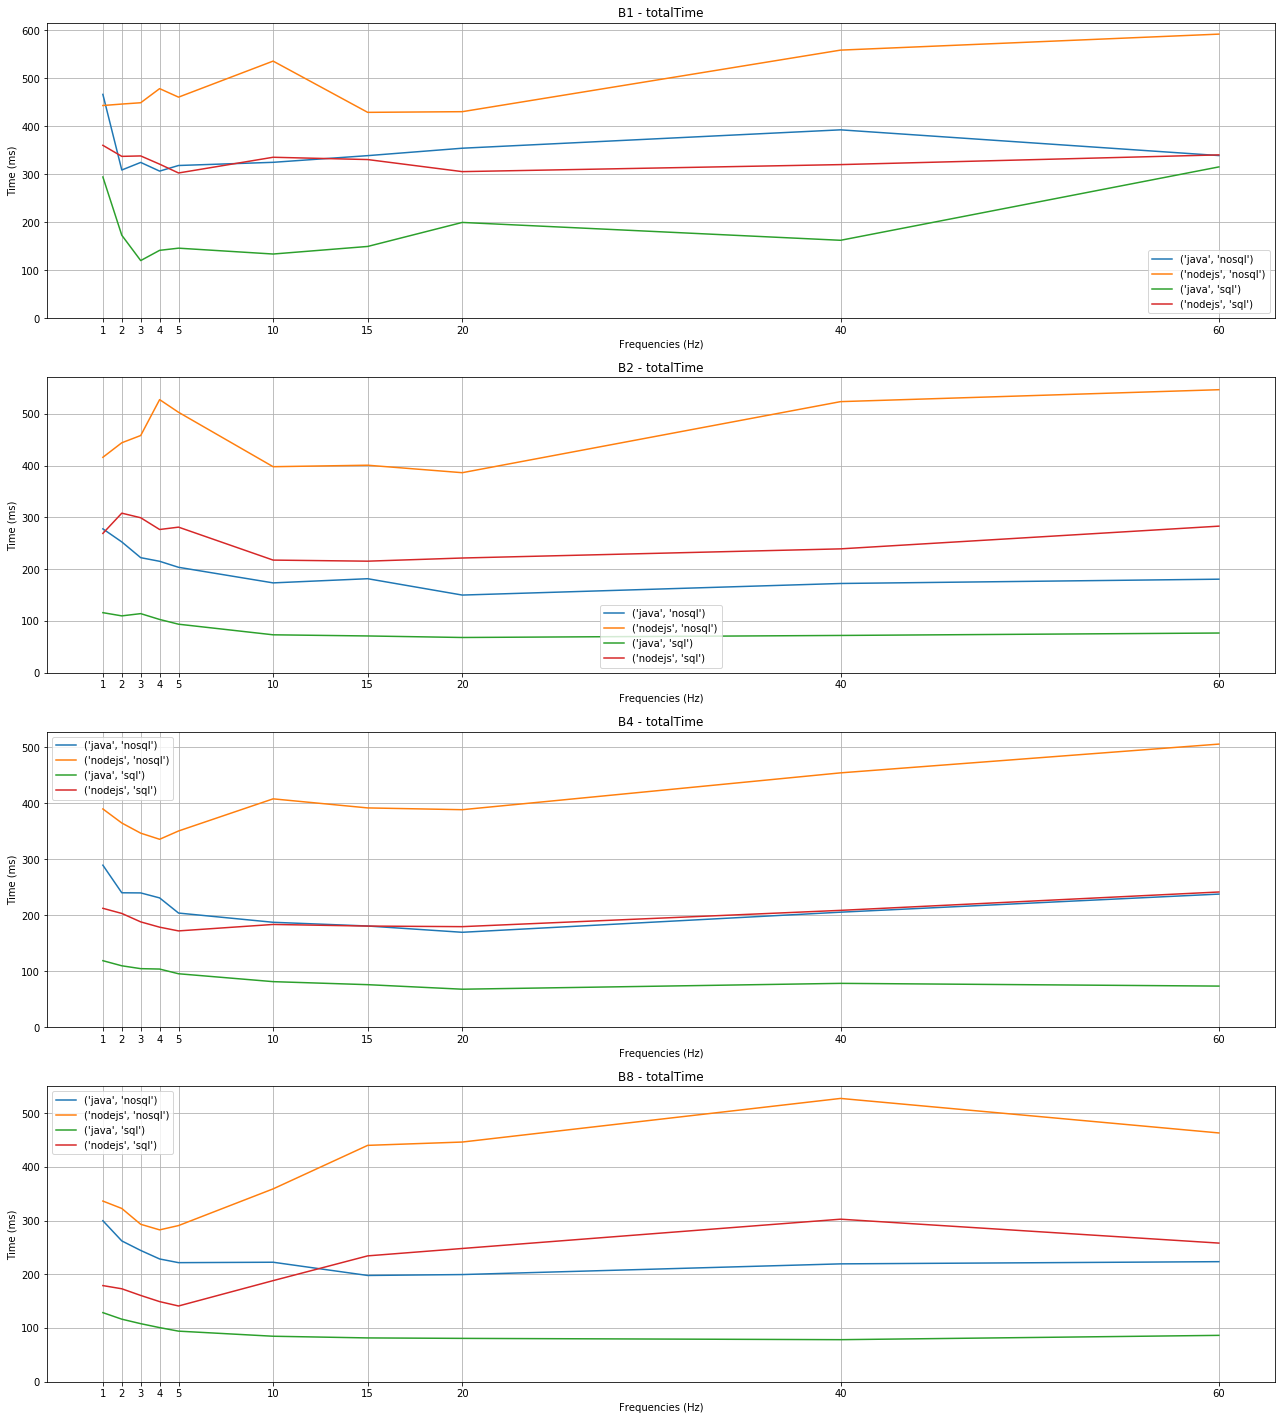

In [12]:
plot_frequencies('totalTime')

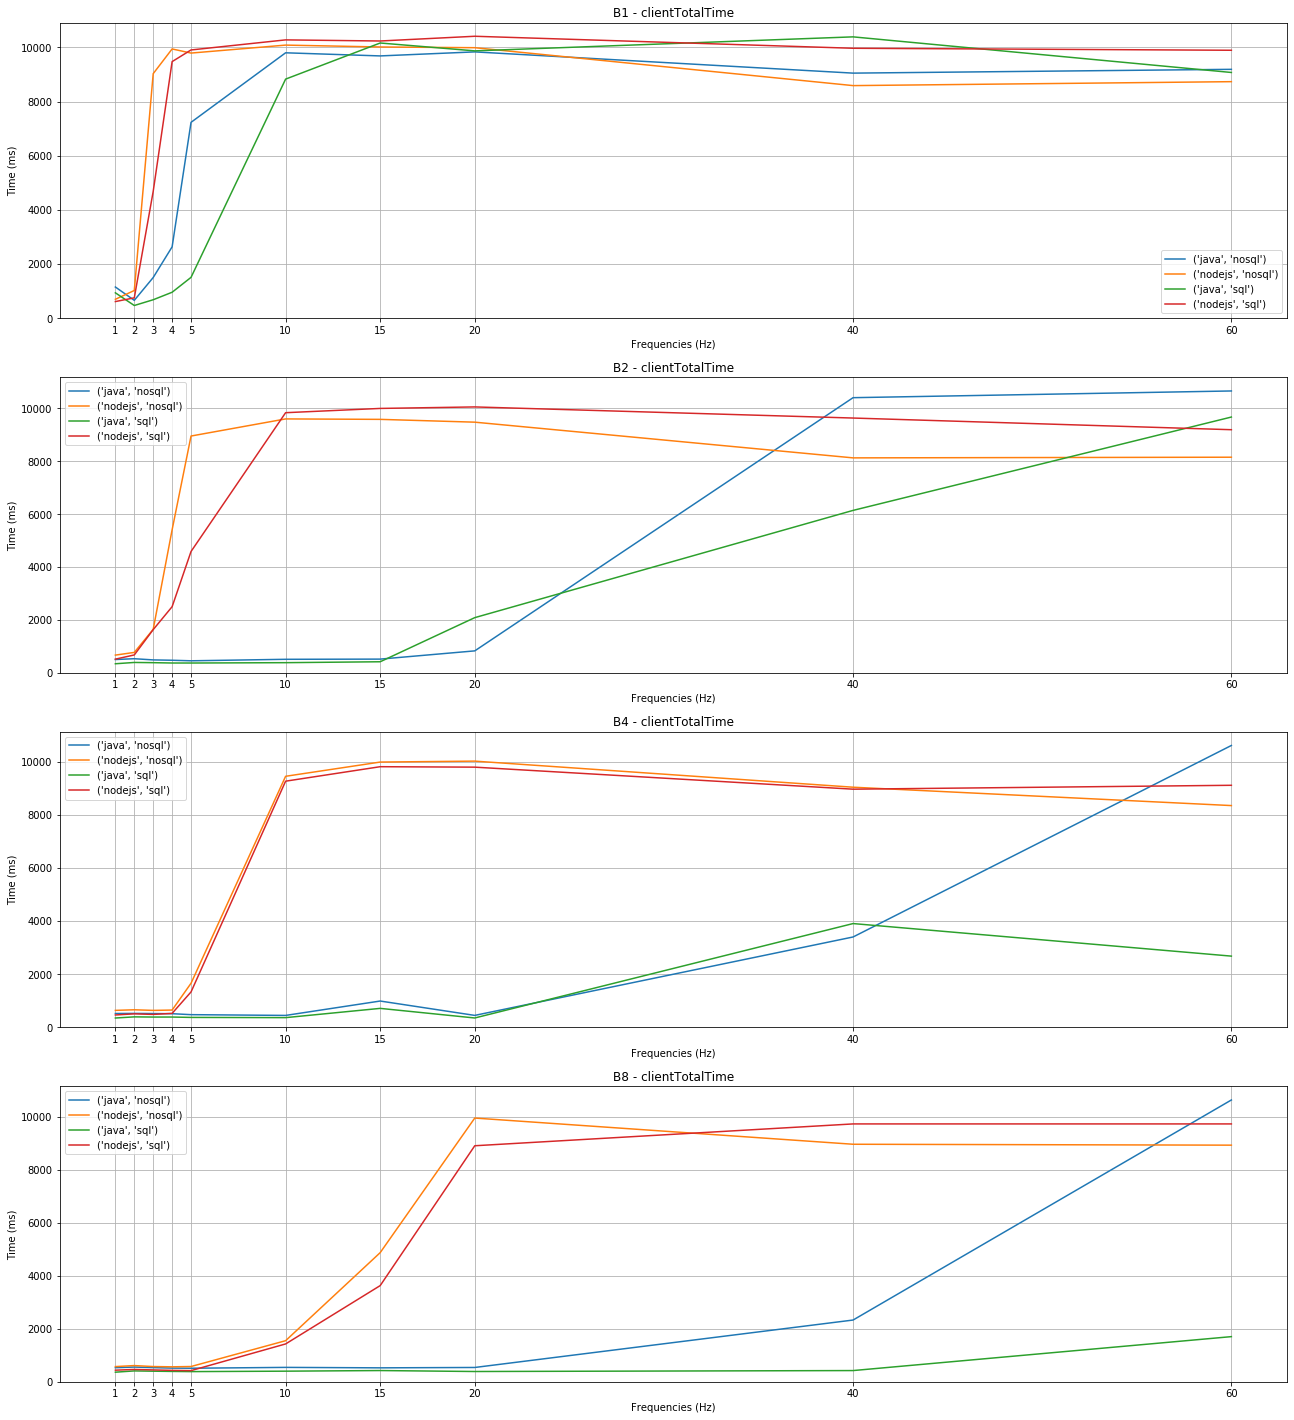

In [13]:
plot_frequencies('clientTotalTime')